# CASE STUDY: FASHION CLASS CLASSIFICATION 
### Aamir Hussain

# PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

# Data Preperation

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
data = fashion_mnist.load_data()

In [4]:
(X_train, y_train), (X_test, y_test) = data # We split the data into training and test samples
X_train, X_test = X_train / 255.0, X_test / 255.0 # We now normalize the data by dividing with 255.0

#The train and test data has a 2d shape of (n, 28, 28) but the convolution layer 
#expects a 3D layer so we add an extra dimension by calling expand_dims function from Numpy.
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1) 
print(f"X_train shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28, 1)
X_test Shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)


#### The above data is now ready to pass into the CNN

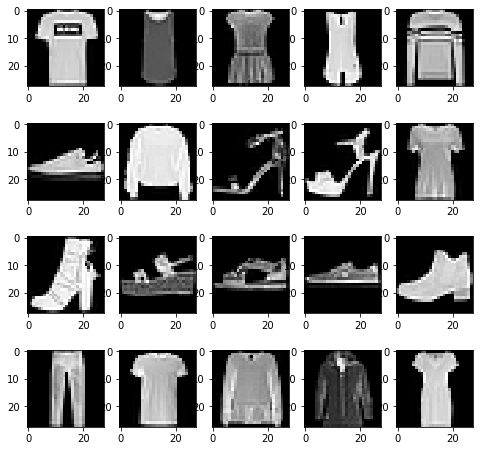

In [5]:
#Lets view some images from the dataset.
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
plt.show()

# Model Building

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=((28, 28, 1))))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, epochs=50, validation_data=(X_train, y_train))

Epoch 1/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6123 - accuracy: 0.7687 - val_loss: 0.4881 - val_accuracy: 0.8594
Epoch 2/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4144 - accuracy: 0.8469 - val_loss: 0.4149 - val_accuracy: 0.8759
Epoch 3/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3638 - accuracy: 0.8657 - val_loss: 0.3668 - val_accuracy: 0.8827
Epoch 4/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3350 - accuracy: 0.8761 - val_loss: 0.3706 - val_accuracy: 0.8787
Epoch 5/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3136 - accuracy: 0.8856 - val_loss: 0.3257 - val_accuracy: 0.9007
Epoch 6/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3022 - accuracy: 0.8887 - val_loss: 0.2847 - val_accuracy: 0.9109
Epoch 7/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2901 - accuracy: 0.8921 - val_loss: 0.2884 -

# Model Evaluation

In [7]:
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy : {:.2f} %'.format(evaluation[1]*100))

313/313 [==============================] - 2s 7ms/step - loss: 0.2613 - accuracy: 0.9043
Test Accuracy : 90.43 %


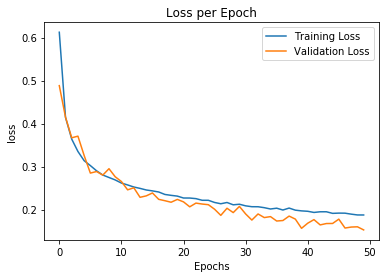

In [8]:
#Lets visualize the Accuracy and loss per epoch of both training and validation dataset
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend();

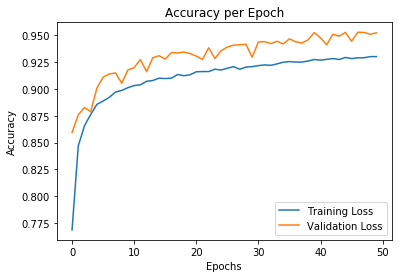

In [9]:
plt.plot(r.history['accuracy'], label='Training Loss')
plt.plot(r.history['val_accuracy'], label='Validation Loss')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [10]:
y_pred = model.predict(X_test).argmax(axis=1)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

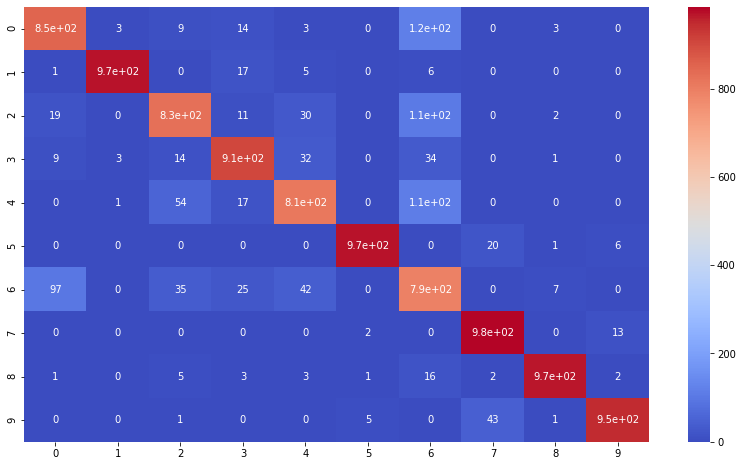

In [12]:
#Lets visualize the missclassified Labels.
import seaborn as sns
plt.figure(figsize=(14,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='coolwarm', annot=True);

Real Label :  Shirt
Predicted Label :  Coat


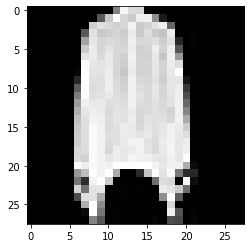

In [13]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split('\n')

missed_idx = np.where(y_test != y_pred)[0]

i = np.random.choice(missed_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
print('Real Label : ', labels[y_test[i]])
print('Predicted Label : ', labels[y_pred[i]])